---
title: "Dataset Preprocessing"
author: "Guntas Singh Saran"
date: "2025-02-12"
image: "output.png"
format:
    html:
        code-fold: false
        code-tools: true
jupyter: python3
---

In [55]:
import os
import shutil
import matplotlib.pyplot as plt
import random
import pandas as pd
from collections import Counter
import cv2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [20]:
images_dir = "./data/images"
labels_dir = "./data/labels"

In [30]:
images_base = set([f.split('.')[0] for f in os.listdir(images_dir)])
labels_base = set([f.split('.')[0] for f in os.listdir(labels_dir)])

intersection = images_base.intersection(labels_base)
uncommon_files = images_base.symmetric_difference(labels_base)

images = [f for f in os.listdir(images_dir) if f.split('.')[0] in intersection]
labels = [f for f in os.listdir(labels_dir) if f.split('.')[0] in intersection]

images_ = [f.split('.')[0] for f in images]
labels_ = [f.split('.')[0] for f in labels]

In [64]:
uncommon_files = list(uncommon_files)
uncommon_files

# delete the uncommon files
for f in uncommon_files:
    if f in images_base:
        os.remove(os.path.join(images_dir, f + ".tif"))
    if f in labels_base:
        os.remove(os.path.join(labels_dir, f + ".txt"))

In [63]:
data = []
for img, lbl in zip(images_, labels_):
    with open(os.path.join(labels_dir, lbl + ".txt"), 'r') as f:
        class_ids = [line.split()[0] for line in f]
    with open(os.path.join(labels_dir, lbl + ".txt"), 'r') as f:
        str = f.read()
        
    if class_ids:
        class_ids = Counter(class_ids)
        data.append((img, str, class_ids['0'], class_ids['1'], class_ids['2']))

df = pd.DataFrame(data, columns=['image', 'label', 'Tile0', 'Tile1', 'Tile2'])

In [57]:
df

,image,label,Tile0,Tile1,Tile2
0,solarpanels_native_1__x0_4225_y0_6594_dxdy_416,0 0.020432692307692308 0.5264423076923077 0.04...,15,0,0
1,solarpanels_native_1__x0_2814_y0_9916_dxdy_416,0 0.8473557692307693 0.795673076923077 0.14182...,37,0,0
2,solarpanels_native_3__x0_9519_y0_0_dxdy_416,0 0.21875 0.4014423076923077 0.076923076923076...,6,0,0
3,solarpanels_native_1__x0_6959_y0_9541_dxdy_416,0 0.6490384615384616 0.4050480769230769 0.0480...,2,0,0
4,solarpanels_native_1__x0_9486_y0_11065_dxdy_416,0 0.9747596153846154 0.28365384615384615 0.050...,6,0,0
...,...,...,...,...,...
2537,solarpanels_native_3__x0_8755_y0_15212_dxdy_416,0 0.43028846153846156 0.2980769230769231 0.057...,3,0,0
2538,solarpanels_native_3__x0_4980_y0_4737_dxdy_416,0 0.7560096153846154 0.2848557692307693 0.0841...,12,0,0
2539,solarpanels_native_1__x0_1503_y0_8830_dxdy_416,0 0.7584134615384616 0.25841346153846156 0.045...,5,0,0
2540,solarpanels_native_1__x0_8199_y0_0_dxdy_416,0 0.04567307692307693 0.49759615384615385 0.09...,9,0,0


In [58]:
# find the indices in df where all the tiles are present
indices = df[(df['Tile0'] > 0) & (df['Tile1'] > 0) & (df['Tile2'] > 0)].index
indices

Index([561, 917, 1282, 1464, 1975, 2394, 2528], dtype='int64')

In [ ]:
df.loc[indices]

,image,label,Tile0,Tile1,Tile2
561,solarpanels_native_1__x0_8991_y0_12048_dxdy_416,0 0.9639423076923077 0.11538461538461539 0.038...,2,1,1
917,solarpanels_native_1__x0_8146_y0_12213_dxdy_416,2 0.020432692307692308 0.08774038461538462 0.0...,6,1,1
1282,solarpanels_native_1__x0_3374_y0_12821_dxdy_416,2 0.375 0.6117788461538461 0.10096153846153846...,4,1,1
1464,solarpanels_native_3__x0_5913_y0_12334_dxdy_416,2 0.07932692307692309 0.3858173076923077 0.100...,4,1,1
1975,solarpanels_native_1__x0_8450_y0_10250_dxdy_416,2 0.05528846153846154 0.7103365384615385 0.100...,6,1,1
2394,solarpanels_native_1__x0_8271_y0_12537_dxdy_416,2 0.030048076923076924 0.9435096153846154 0.06...,4,1,1
2528,solarpanels_native_3__x0_5545_y0_12093_dxdy_416,0 0.020432692307692308 0.8317307692307693 0.04...,4,1,1


In [39]:
print("Original Dataset:\n", df['Tile0'].sum(), df['Tile1'].sum(), df['Tile2'].sum())

Original Dataset:
 29267 130 228


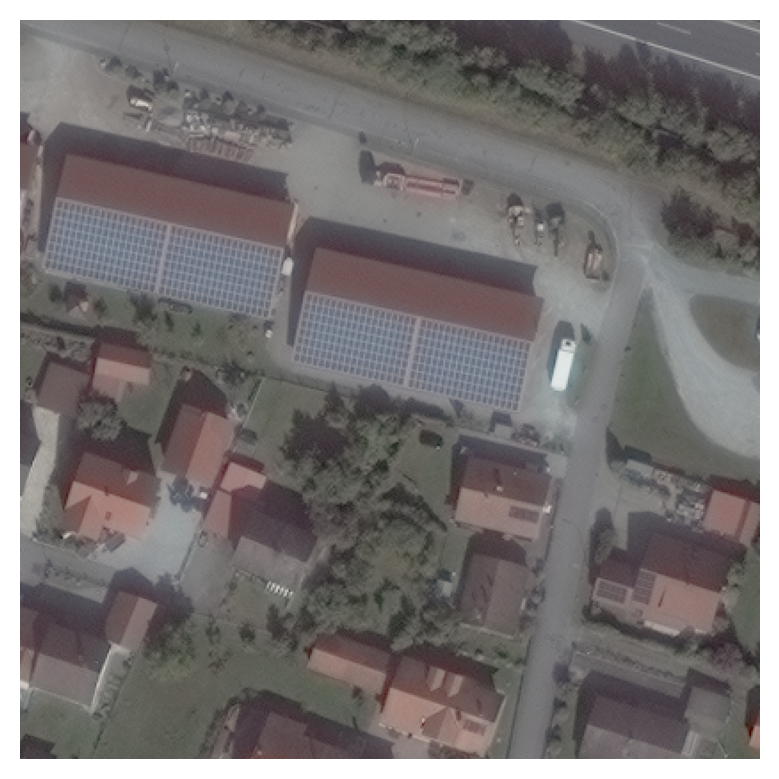

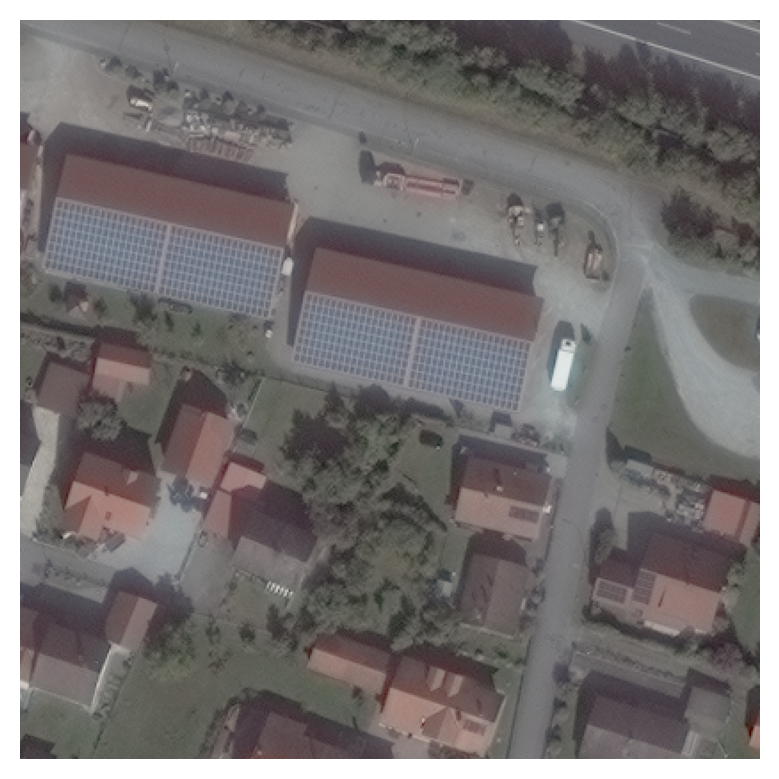

In [23]:
image_path = "./data/images/" + uncommon_files[0] + ".tif"
image_path1 = "./data/images/" + uncommon_files[0][:-3] + ".tif"

# plot the image
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = plt.imread(image_path1)
plt.imshow(image)
plt.axis('off')
plt.show()

In [24]:
len(images_base), len(labels_base)

(2553, 2542)

In [25]:
len(images), len(labels)

(2542, 2542)

In [ ]:
train_image_dir = "./data/train/images"
train_label_dir = "./data/train/labels"
test_image_dir = "./data/test/images"
test_label_dir = "./data/test/labels"
val_image_dir = "./data/val/images"
val_label_dir = "./data/val/labels"

os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

train_size = 0.8
test_size = 0.2

train_images = random.sample(images_, int(train_size * len(images_)))
test_images = list(set(images_) - set(train_images))

val_size = 0.1
val_images = random.sample(train_images, int(val_size * len(train_images)))
train_images = list(set(train_images) - set(val_images))

len(train_images), len(test_images), len(val_images)

(1830, 509, 203)

In [27]:
for image in train_images:
    shutil.copy(os.path.join(images_dir, image + ".tif"), train_image_dir)
    shutil.copy(os.path.join(labels_dir, image + ".txt"), train_label_dir)
    
for image in test_images:
    shutil.copy(os.path.join(images_dir, image + ".tif"), test_image_dir)
    shutil.copy(os.path.join(labels_dir, image + ".txt"), test_label_dir)

for image in val_images:
    shutil.copy(os.path.join(images_dir, image + ".tif"), val_image_dir)
    shutil.copy(os.path.join(labels_dir, image + ".txt"), val_label_dir)

In [28]:
len(os.listdir(train_image_dir)), len(os.listdir(train_label_dir)), len(os.listdir(test_image_dir)), len(os.listdir(test_label_dir)), len(os.listdir(val_image_dir)), len(os.listdir(val_label_dir)), len(images), len(labels)

(1830, 1830, 509, 509, 203, 203, 2542, 2542)

In [60]:
def give_image(filename):
    fileIm = f"./data/images/{filename}.tif"
    fileLb = f"./data/labels/{filename}.txt"
    
    im = cv2.imread(fileIm)
    
    with open(fileLb, 'r') as f:
        lines = f.readlines()
        
    for line in lines:
        line = line.strip().split()
        class_id, x_center, y_center, width, height = map(float, line)
        x_center, y_center = int(x_center * im.shape[1]), int(y_center * im.shape[0])
        width, height = int(width * im.shape[1]), int(height * im.shape[0])
        
        x1, y1 = x_center - width // 2, y_center - height // 2
        x2, y2 = x_center + width // 2, y_center + height // 2

        if class_id == 0:
            cv2.rectangle(im, (x1, y1), (x2, y2), (255, 0, 0), 2)
        elif class_id == 1:
            cv2.rectangle(im, (x1, y1), (x2, y2), (0, 255, 0), 2)
        elif class_id == 2:
            cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

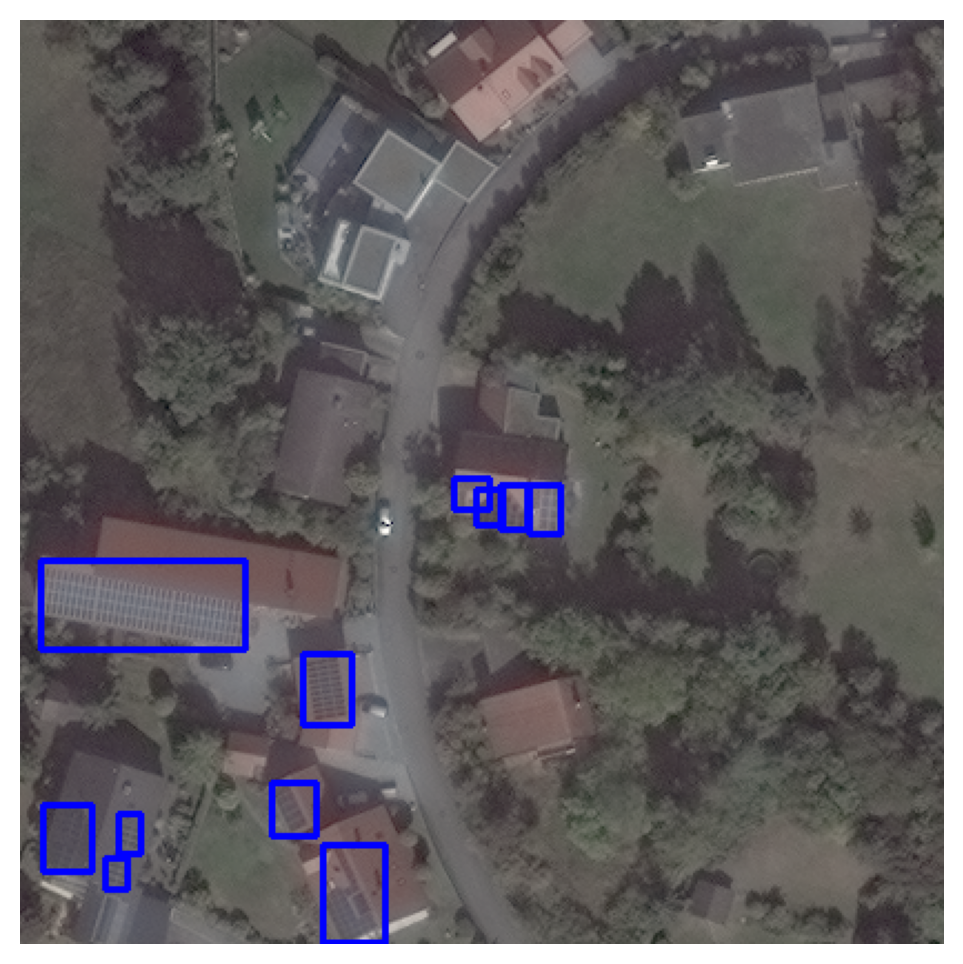

In [61]:
give_image(images_[561])